

<div class="alert alert-info"> <b>Комментарий:</b> пока не смогла установить toc2</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><span style="color: orange">Описание-проекта</span></a></span><ul class="toc-item"><li><a href="#Описание-исследования" data-toc-modified-id="Описание-исследования-0.1.0.1"><span class="toc-item-num">0.1.0.1&nbsp;&nbsp;</span>Описание исследования</a></span></li><li><span><a href="#Цель-исследования." data-toc-modified-id="Цель-исследования.-0.1.0.2"><span class="toc-item-num">0.1.0.2&nbsp;&nbsp;</span>Цель исследования.</a></span></li><li><span><a href="#Задачи-исследования." data-toc-modified-id="Задачи-исследования.-0.1.0.3"><span class="toc-item-num">0.1.0.3&nbsp;&nbsp;</span>Задачи исследования.</a></span></li><li><span><a href="#Исходные-данные." data-toc-modified-id="Исходные-данные.-0.1.0.4"><span class="toc-item-num">0.1.0.4&nbsp;&nbsp;</span>Исходные данные.</a></span></li></ul></li></ul></li><li><span><a href="#Изучение-данных-из-файла-" data-toc-modified-id="Изучение-данных-из-файла--1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла <a id="1-bullet"></a></a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных-" data-toc-modified-id="Предобработка-данных--2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных <a id="2-bullet"></a></a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез-" data-toc-modified-id="Проверка-гипотез--3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка гипотез <a id="3-bullet"></a></a></span><ul class="toc-item"></ul></li><li><span><a href="#Общий-вывод-" data-toc-modified-id="Общий-вывод--4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод <a id="4-bullet"></a></a></span><ul class="toc-item">

# Описание проекта

##### Описание исследования
Компания «Мегалайн», федеральный оператор сотовой связи, предлагает клиентам два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
    
_____
##### Цель исследования.
Провести анализ выборки данных о клиентах двух тарифов.
    
_____
##### Задачи исследования.

1. Предобработка данных.
2. Рассчет дополнительных показателей: 
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячная выручка с каждого пользователя.
_____
##### Исходные данные.
    
Данные 500 пользователей «Мегалайна».
______

## Изучение данных из файла <a id='1-bullet'></a>

In [2]:
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy.stats as st
from functools import reduce
import copy


try:
    calls = pd.read_csv('calls.csv')
    internet = pd.read_csv('internet.csv')
    messages = pd.read_csv('messages.csv')
    tariffs = pd.read_csv('tariffs.csv')
    users = pd.read_csv('users.csv')
except:
    calls = pd.read_csv('/datasets/calls.csv')
    internet = pd.read_csv('/datasets/internet.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    users = pd.read_csv('/datasets/users.csv')

Рассмотрим и преобразуем данные по очередности. Данные о звонках содержаться в датасете Calls:

In [3]:
calls.info()
display(calls.head())

#определим, нет ли пропусков в данных
print(calls.isnull().sum())

#приведем даты к соотвествующему типу данных
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

#округлим значения времени звонков вверх
def ceil_value(value):
    return math.ceil(value)
calls['duration'] = calls['duration'].apply(ceil_value)   

#добавим столбец с месяцем звонка
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


id           0
call_date    0
duration     0
user_id      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.7+ MB


,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


В данных о звонках содержатся:
* `id` - уникальный номер звонка,
* `call_date` - дата звонка
* `duration` - длительность звонка в минутах
* `user_id` - идентификатор пользователя, сделавшего звонок  
Данные о датах звонка были приведены к соответствующему формату и округлены, добавлен столбец с месяцем.  
Среди данных о длительности звонка в минутах есть нулевые значения, когда звонок продлился менее минуты. Это не ошибка, короткий звонок может длиться и менее минуты, но тарификация поминутная, поэтому предлагается округлить нулевые значения до одной минуты.

In [4]:
calls['duration'] = calls['duration'].apply(np.ceil).replace(0,1)
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,1.0,1000,7
1,1000_1,2018-08-17,1.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


Рассмотрим данные об Интернет-сессиях:

In [5]:
internet.info()
display(internet.head())

#определим, нет ли пропусков в данных
print(internet.isnull().sum())

#приведем даты к соотвествующему типу данных
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

#добавим столбец с месяцем
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

#сессии с расходом трафика менее 1 округлим до 1 мегабайта:
internet['mb_used'] = internet['mb_used'].apply(np.ceil).replace(0, 1)

internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
 5   month         149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 6.8+ MB


,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,113.0,2018-11-25,1000,11
1,1,1000_1,1053.0,2018-09-07,1000,9
2,2,1000_2,1198.0,2018-06-25,1000,6
3,3,1000_3,551.0,2018-08-22,1000,8
4,4,1000_4,303.0,2018-09-24,1000,9


Таблица internet (информация об интернет-сессиях) содержит:
* `id` — уникальный номер сессии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date` — дата интернет-сессии
* `user_id` — идентификатор пользователя  
Данные о датах звонка были приведены к соответствующему формату и округлены, добавлен столбец с месяцем. Т.к. расход измеряется в мегабайтах, значения менее 1 были округлены до 1. 
Рассмотрим данные о сообщениях:

In [6]:
messages.info()
display(messages.head())

#определим, нет ли пропусков в данных
print(messages.isnull().sum())

#изменим тип данных user_id на int
messages['user_id'] = messages['user_id'].astype('int')

#приведем даты к соотвествующему типу данных
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

#добавим столбец с месяцем
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

messages.info()
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


id              0
message_date    0
user_id         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int32         
 3   month         123036 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 3.3+ MB


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


Таблица messages (информация о сообщениях): содержит:

* `id` — уникальный номер сообщения
* `message_date` — дата сообщения
* `user_id` — идентификатор пользователя, отправившего сообщение  
Данные о датах сообщения и user_id были приведены к соответствующему формату, добавлен столбец с месяцем.  
Рассмотрим данные о пользователях:

In [7]:
users.info()
display(users.head())

#определим пропуски, означающие подключенных абонентов, и их долю
gaps_users = pd.DataFrame({'null':users.isnull().sum(), '%':users.isnull().sum() / len(users) * 100}) #пропуски в данных и их % от всех данных
display(gaps_users.sort_values(by='null', ascending=False).round())

#приведем даты в столбцах churn_date и reg_date к соответствующим форматам
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,null,%
churn_date,462,92.0
user_id,0,0.0
age,0,0.0
city,0,0.0
first_name,0,0.0
last_name,0,0.0
reg_date,0,0.0
tariff,0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Таблица users (информация о пользователях):
* `user_id` — уникальный идентификатор пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `age` — возраст пользователя (годы)
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* `city` — город проживания пользователя
* `tarif` — название тарифного плана  
Данные о датах подключения и прекращения использования тарифа были приведены к соответствующему формату.
Данные о дате прекращения пользования тарифом говорят о том, что 92% пользователей все еще подключены к тарифу, а 8% перестали пользоваться услугой.

In [8]:
tariffs.info()

#добавим включенный лимит в Гб
tariffs['gb_per_month_included'] = tariffs['mb_per_month_included'] / 1024

tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15.0
1,1000,30720,3000,1950,150,1,1,ultra,30.0


В данных о тарифах:
*  `tariff_name` — название тарифа
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)   
Требуется посчитать для каждого пользователя:
1. Расходы пользователей:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
2. Выручку компании с пользователя:
* помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).  

In [9]:
#1. Расходы пользователей
#объединим сообщения и звонки методом merge
calls_grouped_data = calls.merge(messages, on=['user_id', 'month'], suffixes=['calls', 'message'])

#построим сводную таблицу по user_id 
calls_grouped_data = calls.pivot_table(index=['user_id', 'month'], values='duration',
                                                   aggfunc=['sum', 'count'])
internet_grouped_data = internet.pivot_table(index=['user_id', 'month'], values='mb_used',
                                                   aggfunc=['sum'])
messages_grouped_data = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
#названия столбцов
calls_grouped_data.columns = ['duration', 'calls']
internet_grouped_data.columns = ['mb_used']
messages_grouped_data.columns=['messages']


#переведем мегабайты в гигабайты. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.
internet_grouped_data ['gb_used'] = np.ceil(internet_grouped_data ['mb_used'] / 1024).astype(int)

#объединяем в сводную таблицу по пользователям
calls_internet_merged = calls_grouped_data.merge(internet_grouped_data, on=['user_id', 'month'], how='left')
telecom_data = calls_internet_merged.merge(messages_grouped_data, on=['user_id', 'month'], how='left')
telecom_grouped_data = telecom_data.pivot_table(index=['user_id', 'month'])
telecom_grouped_data.head(20)

calls  duration  gb_used  mb_used  messages
user_id month                                             
1000    5         22     164.0      3.0   2257.0      22.0
        6         43     187.0     23.0  23262.0      60.0
        7         47     346.0     14.0  14017.0      75.0
        8         52     418.0     14.0  14072.0      81.0
        9         58     478.0     15.0  14583.0      57.0
        10        57     363.0     15.0  14717.0      73.0
        11        43     344.0     15.0  14769.0      58.0
        12        46     341.0     10.0   9829.0      70.0
1001    11        59     444.0     19.0  18460.0       NaN
        12        63     430.0     14.0  14059.0       NaN
1002    6         15     118.0     11.0  10878.0       4.0
        7         26     219.0     18.0  17615.0      11.0
        8         42     294.0     20.0  20357.0      13.0
        9         36     217.0     17.0  16724.0       4.0
        10        33     221.0     14.0  13913.0      10.0
        11        32     250.0     19.0  18621.0      16.0
        12        33     242.0     18.0  18147.0      12.0
1003    8         55     392.0      9.0   8572.0      37.0
        9        134     990.0     13.0  12479.0      91.0
        10       108     866.0     15.0  14779.0      83.0

Из таблицы можно сделать выводы об объемах полученных каждым пользователем услуг по месяцам. Так, абонент 1000 в декабре израсходовал:
*  `341 мин` трафика, совершив 46 звонков;
* `70` сообщений;
* `10 Гб` интернета.
Для расчетов выручки добавим значение тарифного плана в таблицу.

In [10]:
#пропуски заменяем на нули
telecom_grouped_data.loc[telecom_grouped_data['duration'].isna(), 'duration'] = 0
telecom_grouped_data.loc[telecom_grouped_data['messages'].isna(), 'messages'] = 0
telecom_grouped_data.loc[telecom_grouped_data['gb_used'].isna(), 'gb_used'] = 0

for user in telecom_grouped_data.index:
    telecom_grouped_data.loc[user, 'tariff'] = users.loc[user[0]-1000, 'tariff']

telecom_grouped_data.head(20)

calls  duration  gb_used  mb_used  messages tariff
user_id month                                                    
1000    5         22     164.0      3.0   2257.0      22.0  ultra
        6         43     187.0     23.0  23262.0      60.0  ultra
        7         47     346.0     14.0  14017.0      75.0  ultra
        8         52     418.0     14.0  14072.0      81.0  ultra
        9         58     478.0     15.0  14583.0      57.0  ultra
        10        57     363.0     15.0  14717.0      73.0  ultra
        11        43     344.0     15.0  14769.0      58.0  ultra
        12        46     341.0     10.0   9829.0      70.0  ultra
1001    11        59     444.0     19.0  18460.0       0.0  smart
        12        63     430.0     14.0  14059.0       0.0  smart
1002    6         15     118.0     11.0  10878.0       4.0  smart
        7         26     219.0     18.0  17615.0      11.0  smart
        8         42     294.0     20.0  20357.0      13.0  smart
        9         36     217.0     17.0  16724.0       4.0  smart
        10        33     221.0     14.0  13913.0      10.0  smart
        11        32     250.0     19.0  18621.0      16.0  smart
        12        33     242.0     18.0  18147.0      12.0  smart
1003    8         55     392.0      9.0   8572.0      37.0  ultra
        9        134     990.0     13.0  12479.0      91.0  ultra
        10       108     866.0     15.0  14779.0      83.0  ultra

Проведем расчет выручки с каждого пользователя ежемесячно:

In [11]:
# функция подсчета выручки с каждого пользователя в месяц
def revenue(row):
    messages = row['messages']
    gb_used = row['gb_used']
    tariff = row['tariff']
    duration = row['duration']
    calls = row['calls']
    
    if tariff == 'smart':
        extra_duration = duration - tariffs.loc[0, 'minutes_included']
        extra_gb = gb_used - tariffs.loc[0, 'gb_per_month_included']
        extra_messages = messages - tariffs.loc[0, 'messages_included']
        
        if extra_duration < 0: #если лимиты не превышены
            extra_duration = 0
        if extra_gb < 0: 
            extra_gb = 0
        if extra_messages < 0: 
            extra_messages = 0
        
        return (tariffs.loc[0, 'rub_per_message'] * extra_messages + #дополнительно за сообщения 
                   tariffs.loc[0, 'rub_per_gb'] * extra_gb + #дополнительно за интернет
                   tariffs.loc[0, 'rub_per_minute'] * extra_duration + #дополнительно за звонки
                   tariffs.loc[0, 'rub_monthly_fee'] #абонентская плата
                  ) 
    else:
        extra_duration = duration - tariffs.loc[1, 'minutes_included']
        extra_gb = gb_used - tariffs.loc[1, 'gb_per_month_included']
        extra_messages = messages - tariffs.loc[1, 'messages_included']
        
        if extra_duration < 0: 
            extra_duration = 0
        if extra_gb < 0: 
            extra_gb = 0
        if extra_messages < 0:
            extra_messages = 0
        
        return (tariffs.loc[1, 'rub_per_message'] * extra_messages + 
                   tariffs.loc[1, 'rub_per_gb'] * extra_gb + 
                   tariffs.loc[1, 'rub_per_minute'] * extra_duration + 
                   tariffs.loc[1, 'rub_monthly_fee']
                  )

telecom_grouped_data['revenue'] = telecom_grouped_data.apply(revenue, axis=1)
telecom_grouped_data.head(10)

calls  duration  gb_used  mb_used  messages tariff  revenue
user_id month                                                             
1000    5         22     164.0      3.0   2257.0      22.0  ultra   1950.0
        6         43     187.0     23.0  23262.0      60.0  ultra   1950.0
        7         47     346.0     14.0  14017.0      75.0  ultra   1950.0
        8         52     418.0     14.0  14072.0      81.0  ultra   1950.0
        9         58     478.0     15.0  14583.0      57.0  ultra   1950.0
        10        57     363.0     15.0  14717.0      73.0  ultra   1950.0
        11        43     344.0     15.0  14769.0      58.0  ultra   1950.0
        12        46     341.0     10.0   9829.0      70.0  ultra   1950.0
1001    11        59     444.0     19.0  18460.0       0.0  smart   1350.0
        12        63     430.0     14.0  14059.0       0.0  smart    550.0

### Вывод

Данные были подготовлены для дальнейшего анализа: приведены к нужному типу, округлены в соответствии с порядком тарификации и объединены в сводную таблицу по пользователям.

## Анализ данных <a id='2-bullet'></a>

В таблице представлены данные о средних значениях затрат каждого из пользователей. Например, абонент 1000 в среднем использовал 345 мин, 28 Гб интернет, 65 сообщений в месяц.

In [12]:
medians = telecom_grouped_data.pivot_table(index='user_id', values=['duration', 'messages', 'gb_used', 'revenue'], aggfunc='median')
for user_id in users['user_id']:
    medians.loc[user_id, 'tariff'] = users.loc[user_id-1000, 'tariff']
medians.head()

,duration,gb_used,messages,revenue,tariff
user_id,,,,,
1000,345.0,14.5,65.0,1950.0,ultra
1001,437.0,16.5,0.0,950.0,smart
1002,221.0,18.0,11.0,1150.0,smart
1003,844.0,12.0,83.0,1950.0,ultra
1004,136.5,18.0,154.5,1950.0,ultra


Описательная статистика показывает, что половина пользователей тарифа Smart израсходовала более 454 минут на звонки, более 17 Гб интернета, 28 сообщений. То есть эти пользователи потребляют услуги как минимум выше лимита, особенно по интернет-расходам. Ожидаемо, расходуется в среднем более 737 руб, что выше абонентской платы. В тоже время, половина пользователей тарифа Ultra, расходуют менее 560 минут на звонки, 20 Гб интернета, 50 сообщений, то есть заметно менее лимита тарифа. А средняя выручка компании от оказания услуг соответствует абонентской плате.  
Стандартное отклонение расходов по тарифам показывает, что у тарифа Smart значения выручки сильно рассеяны относительно среднего, а у Ultra - сконцентрированы около него. Значения потребления услуг у пользователей тарифа Ultra колеблется сильнее, чем в Smart, но из-за высокого значения лимита и более низких цен на потребление сверх тарифа это не оказывает такого заметного влияния на выручку, как в Smart.

In [13]:
# описательная статистика:
medians.dropna(subset=['duration'], inplace=True)
desc_stat = medians.pivot_table(index=['tariff'], values=['duration', 'gb_used', 'messages','revenue'], 
                    aggfunc={'duration': [np.median, np.var, np.std], 
                             'gb_used': [np.median, np.var, np.std], 
                             'messages': [np.median, np.var, np.std],
                             'revenue': [np.median, np.var, np.std],})
desc_stat.round()

duration                 gb_used            messages                \
         median    std      var  median  std   var   median   std     var   
tariff                                                                      
smart     454.0  163.0  26590.0    17.0  4.0  17.0     28.0  28.0   786.0   
ultra     560.0  297.0  88461.0    20.0  9.0  76.0     50.0  48.0  2352.0   

       revenue                   
        median    std       var  
tariff                           
smart   1150.0  737.0  543542.0  
ultra   1950.0  300.0   90222.0

Построим гистограммы распределения. Для тарифа Smart:

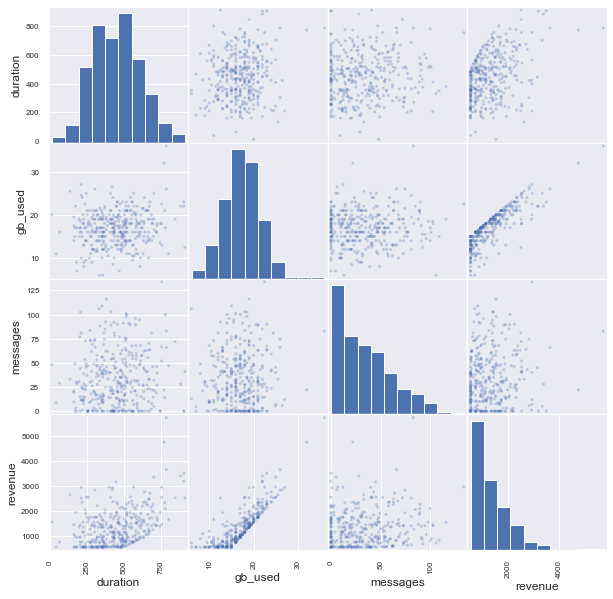

In [31]:
pd.plotting.scatter_matrix(medians.loc[medians['tariff'] == 'smart'], alpha = 0.3, figsize = (10,10));


Из графиков можно сделать вывод, что распределение средних показателей расходов следующее:
* кол-во минут - нормальное
* кол-во Гб - нормальное
* кол-во сообщений - распределение Пуассона
* объем выручки - распределение Пуассона  
Построим аналогичные гистограммы распределения для тарифа Ultra:

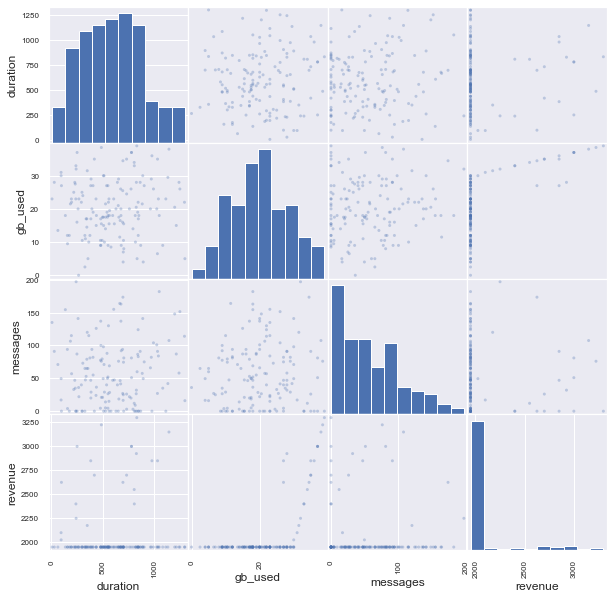

In [32]:
pd.plotting.scatter_matrix(medians.loc[medians['tariff'] == 'ultra'], alpha = 0.3, figsize = (10,10));


Из графиков можно сделать вывод, что распределение средних показателей расходов пользователей тарифа Ultra следующее:
* кол-во минут - нормальное
* кол-во Гб - нормальное
* кол-во сообщений - распределение Пуассона
* объем выручки - распределение Пуассона  
Сравним распределения с помощью диаграмм размаха. Графические данные подтверждают сделанные ранее теоретические выводы о поведении пользователей тарифов.

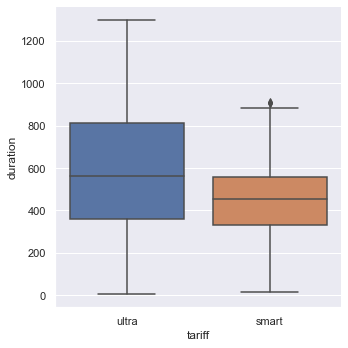

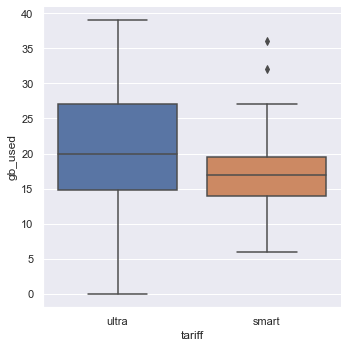

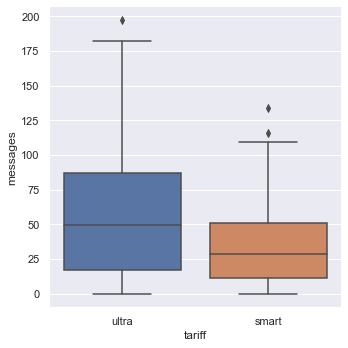

In [33]:
for column in ['duration', 'gb_used', 'messages']:    
    sns.catplot(x="tariff", y=column, kind="box", data=medians, orient='v')

### Вывод

1.  Пользователи Smart потребляют услуги как минимум выше лимита, особенно по интернет-расходам. Высокая абонентская плата по тарифу Ultra дает абонентам больший пакет включенных бесплатных сообщений, поэтому, как правило, пользователи предпочитают не тратить сверх лимита. 
2. Анализ данных пользователей тарифа Smart показал, что значения выручки сильно рассеяны относительно среднего, в отличие от Ultra, где они сконцентрированы около него. Это говорит о том, что расход услуг у пользователей тарифа Ultra колеблется сильнее, чем в Smart, но высокий порог лимита и более низкие цены на потребление сверх тарифа не дают оказывать этим факторам заметного влияния на выручку, как в Smart.  
Потребительское поведение абонентов тарифа "Ultra" многообразнее, по причине менее ограниченного бесплатного потребления услуг, им не нужно тщательно анализировать расходы, т.к. они используют их в рамках тарифного пакета. В тоже время абоненты "Smart" стараются быть экономнее.

## Проверка гипотез <a id='3-bullet'></a>

Сравнение средней выручке по тарифам.  
Гипотеза нулевая (H₀): средняя выручка пользователей тарифов «Ultra» и «Smart» равна.  
Альтернативная гипотеза:  
Гипотеза 1 ( H₁): средняя выручка пользователей тарифов отличается.  
Сравнение средней выручке по городам.  
Гипотеза нулевая (H₀): средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.  
Альтернативные гипотезы:  
Гипотеза 1 ( H₁): средняя выручка пользователей разных регионов отличается. 
   
alpha = 5%  
Применяется метод scipy.stats.ttest_ind с параметром equal_var = False, т.к. дисперсии выборок отличаются.

In [34]:
ultra = telecom_grouped_data.query('tariff == "ultra"')['revenue']
smart = telecom_grouped_data.query('tariff == "smart"')['revenue']

alpha = .05

results = st.ttest_ind(
    ultra, 
    smart, 
    equal_var=False)

print('p-значение:', results.pvalue.round(3))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

telecom_grouped_data.pivot_table(index='tariff', values='revenue', aggfunc='median')

p-значение: 0.0
Отвергаем нулевую гипотезу


,revenue
tariff,
smart,1077.0
ultra,1950.0


Нулевая гипотеза отвергается, альтернативная гипотеза не отвергается. С уверенностью 95%, можно сделать вывод, что доходы "Мегалайна" с пользователя по тарифу "Ultra" отличаются по сравнению с доходами от тарифа "Smart".  
Проверим гипотезу о равенстве выручки от оказания услуг пользователям из разных регионов.

In [35]:
# вносим данные о городе для каждого пользователя
for user in telecom_grouped_data.index:
    telecom_grouped_data.loc[user, 'city'] = users.loc[user[0]-1000, 'city']

moscow = telecom_grouped_data.query('city == "Москва"')['revenue']
regions = telecom_grouped_data.query('city != "Москва"')['revenue']

alpha = .05

results = st.ttest_ind(
    moscow, 
    regions, 
    equal_var=False)

print('p-значение:', results.pvalue.round(3))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.477
Не получилось отвергнуть нулевую гипотезу


Полученное нами p-значение равно 0.5, а значит есть вероятность того, что отличие средних значений выборок случайно и нулевая гипотеза не может быть отвергнута.


### Общий вывод <a id='4-bullet'></a>

В результате проведенного анализа сделаны следующие выводы: доходы "Мегалайна" с пользователя по тарифу "Ultra" отличаются от доходов по тарифу "Smart".   
* доходы "Мегалайна" с пользователя по тарифу "Ultra" отличаются по сравнению с доходами от тарифа "Smart".
* не смотря на то, что абонентская плата тарифа Smart ниже, пользователям не хватает лимитного объема услуг, поэтому они докупают их.  Согласно данным о потребительском поведении, абоненты стремятся контролировать свои затраты сверх лимитированного пакета, т.к. это существенно меняет стоимость услуг в месяц из-за дороговизны сверхлимитных услуг.
* пользователи тарифа «Ultra» не используют лимитированный пакет в полном объеме. Их потребительское поведение не сдерживается экономическим фактором.
* средние доходы от пользователей в Москве не отличаются от доходов в других населенных пунктах: разница статистически незначима (p-значение: 0,5)